In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast

In [2]:
""" MusicOSet """

fp = "../data/musicoset_metadata/songs.csv"
df_songs_meta = pd.read_csv(fp, sep='\t')
print("SONGS")
print(df_songs_meta.head())

fp = "../data/musicoset_metadata/artists.csv"
df_artists_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ARTISTS")
print(df_artists_meta.head())

fp = "../data/musicoset_metadata/tracks.csv"
df_tracks_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("TRACKS")
print(df_tracks_meta.head())

fp = "../data/musicoset_songfeatures/lyrics.csv"
df_lyrics = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("LYRICS")
print(df_lyrics.head())

fp = "../data/musicoset_songfeatures/acoustic_features.csv"
df_acoustic_features = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ACOUSTIC FEATURES")
print(df_acoustic_features.head())


SONGS
                  song_id                                      song_name  \
0  3e9HZxeyfWwjeyPAMmWSSQ                                  thank u, next   
1  5p7ujcrUXASCNwRaWNHR1C                                     Without Me   
2  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
3  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   
4  1rqqCSm0Qe4I9rUvWncaom                                     High Hopes   

                                           billboard  \
0                 ('Thank U, Next', 'Ariana Grande')   
1                           ('Without Me', 'Halsey')   
2                     ('Sicko Mode', 'Travis Scott')   
3  ('Sunflower (Spider-Man: Into The Spider-Verse...   
4              ('High Hopes', 'Panic! At The Disco')   

                                             artists  popularity  explicit  \
0        {'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}          86      True   
1               {'26VFTg2z8YR0cCuwLzESi2': '

# index by song

In [11]:
try:
    df_songs_meta = df_songs_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_tracks_meta = df_tracks_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_acoustic_features = df_acoustic_features.set_index('song_id')
except:
    # already done
    pass

# set song ID as index
try:
    df_lyrics = df_lyrics.set_index('song_id')
except:
    # already done
    pass

# standardize lyrics

In [12]:
# have some nan, lets remove
print(f"number of songs : {len(df_lyrics)}")
df_lyrics_clean = df_lyrics.dropna()
print(f"number of songs with lyrics : {len(df_lyrics_clean)}")

df_lyrics_clean.head(20)

number of songs : 20404
number of songs with lyrics : 19663


,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,['[Verse 1]\nThought I\'d end up with Sean\nBu...
5p7ujcrUXASCNwRaWNHR1C,"[""[Verse 1]\nFound you when your heart was bro..."
2xLMifQCjDGFmkHkpNLD9h,"['[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun..."
1rqqCSm0Qe4I9rUvWncaom,"[""[Intro]\nHigh, high hopes\n\n[Chorus]\nHad t..."
0bYg9bo50gSsH3LtXe2SQn,"[""[Intro]\nI-I-I don't want a lot for Christma..."
5hslUAKq9I9CG2bAulFkHN,['[Chorus]\nIt\'s the most wonderful time of t...
2EjXfH91m7f8HiJN1yQg97,['[Chorus]\nRockin\' around the Christmas Tree...
0MMSmg7zyo6pOKZrfHUOqu,"[""Have a holly, jolly Christmas;\nIt's the bes..."
6Z924AupOiJLdnAKH6UgCu,"[""Jingle bell, jingle bell, jingle bell rock\n..."


In [13]:
# df_artists_meta.loc["4DdkRBBYG6Yk9Ka8tdJ9BW"]["name"]
idx = 19658
print(df_lyrics_clean.iloc[idx])
print(df_songs_meta.loc[df_lyrics_clean.iloc[idx].name])

lyrics    ['[Verse 1: Big Boi]\nWell, it\'s the M-I-croo...
Name: 2pMAmZdHfQHyqJCXJbfhK3, dtype: object
song_name                    Southernplayalisticadillacmuzik
billboard     ('Southernplayalisticadillacmuzik', 'OutKast')
artists                {'1G9G7WwrXka3Z1r7aIDjI7': 'OutKast'}
popularity                                                50
explicit                                               False
song_type                                               Solo
Name: 2pMAmZdHfQHyqJCXJbfhK3, dtype: object


# other standardization (if not covered by lemmization / tokenization)

- words ending with "ing'", e.g. burnin' to burning
- rap words: prolly -> probably

In [14]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


def standardize_lyrics(lyrics, i, verbose=False):
    if verbose:
        print(i)
    if lyrics is np.nan or len(lyrics) == 0:
        return np.nan
    
    # remove new lines
    clean = lyrics.replace("\\n\\n", ". ").replace("\\n", ". ").replace("\\", "")
    
    # remove square brackets around lyrics
    clean = clean[1:-1]
    
    # if possible, extract chorus, pre-chorus, post-chorus, bridge, verses
    song_parts = ["Chorus", "Pre-Chorus", "Post-Chorus", "Bridge", "Verse 1", "Verse 2", "Verse 3", "Verse 4"]
    if verbose:
        for part in song_parts:
            text = find_between(clean, f"[{part}]. ", "[")
            if len(text):
                print(f"\n{part} : {text}")
    
    for part in song_parts:
        clean = clean.replace(f"[{part}]. ", "")
        
        
    # remove anything else in square brackets
    clean = re.sub("[\[].*?[\]]", "", clean)
    
    # clean up
    clean = clean.replace('"', "")
    try:
        while clean[0] == "." or clean[0] == " " or clean[0] == "'":
            clean = clean[1:]
    except:
        return np.nan
    try:
        if clean[-1] == "'":
            clean = clean[:-1]
    except:
        return np.nan
        
    return clean


idx = 19658   # 1
print(df_lyrics_clean["lyrics"][idx])
print()
lyrics_stand = standardize_lyrics(df_lyrics_clean["lyrics"][idx], 0, False)
print(f"\n\n{lyrics_stand}")

['[Verse 1: Big Boi]\nWell, it\'s the M-I-crooked letter coming around the South\nRolling straight Hammers and Vogues in that old Southern slouch\nPlease, ain\'t nothing but incense in my atmosphere\nI\'m bending corners in my \'Lac, boi\n\'Cause that\'s how we be rolling here\nDeep, the slang is in effect because it\'s Georgia\nKicking the khakis and Adidas\nPacking yo\' heaters \'cause you \'sposed to, cousin\nCatfish and grits is how my flow flows\nRolling steady in that Caddy but them 50 bottles got to go\nSee, juice and gin used to be my friend from the beginning\nNow I\'m just a player sipping sauce every now and then\nTo catch a buzz like a bumble bee\nNiggas who tried to fuck with me\nGet sprayed like Raid \'cause it ain\'t nothing to see\n\n[Verse 2: Andre 3000]\nMy heat is in the trunk along with that quad knock\nNo, my heart don\'t pump no Kool-Aid\nJump and you\'ll get too sprayed\nWho raise yo\' block? The one and only OutKast\nMany a nigga falling fast and I continue blas

In [15]:
# # for testing
# for k, lyr in enumerate(df_lyrics_stand["lyrics"].values):
#     standardize_lyrics(lyr, k, verbose=True)

# standardize all lyrics
df_lyrics_stand = df_lyrics_clean.copy()
df_lyrics_stand['lyrics'] = df_lyrics_stand['lyrics'].apply(standardize_lyrics, args=(0, False))
df_lyrics_stand.head(10)

,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'..."
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes..."
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ..."
6Z924AupOiJLdnAKH6UgCu,"Jingle bell, jingle bell, jingle bell rock. Ji..."


In [16]:
# drop any more NAN (instrumental songs / bad lyrics parsing)
print(f"before : {len(df_lyrics_stand)}")
df_lyrics_stand_2 = df_lyrics_stand.dropna()
print(f"after : {len(df_lyrics_stand_2)}")

before : 19663
after : 19607


# add interesting song metadata

In [17]:
df_concat = df_lyrics_stand_2.copy()
df_concat["explicit"] = df_songs_meta["explicit"].astype(int)
df_concat["artists_dict"] = df_songs_meta["artists"]
df_concat["song_name"] = df_songs_meta["song_name"]
df_concat["song_popularity"] = df_songs_meta["popularity"]
df_concat["release_date"] = df_tracks_meta["release_date"]

acoustic_features = ["mode", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
for af in acoustic_features:
    df_concat[af] = df_acoustic_features[af]

print(df_concat.shape)
df_concat.head(10)

(19607, 16)


,lyrics,explicit,artists_dict,song_name,song_popularity,release_date,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,2019-02-08,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,2018-10-04,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,2018-08-03,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,2018-06-22,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1994-11-01,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...,0,{'4sj6D0zlMOl25nprDJBiU9': 'Andy Williams'},It's the Most Wonderful Time of the Year,52,1963,1,0.76600,0.240,0.598,0.000000,0.1170,-8.435,0.0370,0.776,202.082
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...,0,{'4cPHsZM98sKzmV26wlwD2W': 'Brenda Lee'},Rockin' Around The Christmas Tree,53,1964-10-19,1,0.61400,0.589,0.472,0.000000,0.5050,-8.749,0.0502,0.898,67.196
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ...",0,{'0MHgLfmQdutffmvWe5XBTN': 'Burl Ives'},A Holly Jolly Christmas,3,2015-10-28,1,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456
6Z924AupOiJLdnAKH6UgCu,"Jingle bell, jingle bell, jingle bell rock. Ji...",0,{'38EmEgXkgK51MT2tPY0EoC': 'Bobby Helms'},Jingle Bell Rock,51,1983-01-01,1,0.65100,0.757,0.428,0.000000,0.0644,-8.537,0.0360,0.816,119.813


# extract just year / decade

In [18]:
def get_year(date):
    return int(date[:4])


release_dates = df_concat["release_date"]
# print(release_dates)
years = [get_year(date) for date in release_dates]
# print(years)

df_concat["release_year"] = years
df_concat = df_concat.drop(columns=["release_date"])
df_concat.head()

,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994


# add artist metadata

In [19]:
try:
    df_artists_meta = df_artists_meta.set_index('artist_id')
except:
    # already done
    pass

In [20]:
df_artists_meta.head(10)
# do histogram of all genres, and take the one most popular

,name,followers,popularity,artist_type,main_genre,genres,image_url
artist_id,,,,,,,
66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
26VFTg2z8YR0cCuwLzESi2,Halsey,7368242,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
246dkjvS1zLTtiykXe5h60,Post Malone,16737002,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...
64KEffDW9EtZ1y2vBYgq8T,Marshmello,15566666,91,DJ,brostep,"['brostep', 'progressive electro house']",https://i.scdn.co/image/65f40b9a99ebb96921d536...
7EQ0qTo7fWT7DPxmxtSYEc,Bastille,3776115,85,band,metropopolis,"['metropopolis', 'modern rock', 'pop', 'tropic...",https://i.scdn.co/image/7fd538c4aa21542d840e17...
20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco,7749228,88,band,baroque pop,"['baroque pop', 'emo', 'modern rock', 'pop punk']",https://i.scdn.co/image/58518a04cdd1f20a24cf05...
4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,4682308,81,singer,dance pop,"['dance pop', 'pop', 'r&b', 'urban contemporary']",https://i.scdn.co/image/b9e312cf57cca3fab33e3d...


In [21]:
def get_artists(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artists = list(artist_dict.values())
    if "Unknown" in artists:
        artists.remove("Unknown")
    return artists

def get_genres(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    genres = []
    for artist in artist_keys:
        try:
            genres += ast.literal_eval(df_artists_meta.loc[artist]["genres"])
        except:
            # not in artist metadata
            continue
    if len(genres) == 0:
        genres = np.nan
    return genres

def get_main_genre(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    main_genre = []
    for artist in artist_keys:
        try:
            artist_main_genre = df_artists_meta.loc[artist]["main_genre"]
            if artist_main_genre != "-":
                main_genre.append(artist_main_genre)
        except:
            # not in artist metadata
            continue
    if len(main_genre) == 0:
        main_genre = np.nan
    return main_genre


artist_dicts = df_concat["artists_dict"]
artists = [get_artists(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
genres = [get_genres(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in genres])
print(f"number of songs with no genre : {h}")
main_genre = [get_main_genre(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in main_genre])
print(f"number of songs with no main genre : {h}")

# add columns to main dataframe
df_concat["artists"] = artists
df_concat["genres"] = genres
df_concat["main_genre"] = main_genre
df_concat.head()

number of songs with no genre : 1785
number of songs with no main genre : 1785


,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,artists,genres,main_genre
song_id,,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,[Ariana Grande],"[dance pop, pop, post-teen pop]",[dance pop]
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,[Halsey],"[dance pop, electropop, etherpop, indie poptim...",[dance pop]
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,[Travis Scott],"[pop, pop rap, rap]",[pop]
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,[Panic! At The Disco],"[baroque pop, emo, modern rock, pop punk]",[baroque pop]
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,[Mariah Carey],"[dance pop, pop, r&b, urban contemporary]",[dance pop]


In [22]:
print(f"before : {len(df_concat)}")
df_concat = df_concat.dropna()
print(f"after : {len(df_concat)}")

before : 19607
nafer : 17822


# visualization

array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'explicit'}>, <AxesSubplot:>]],
      dtype=object)

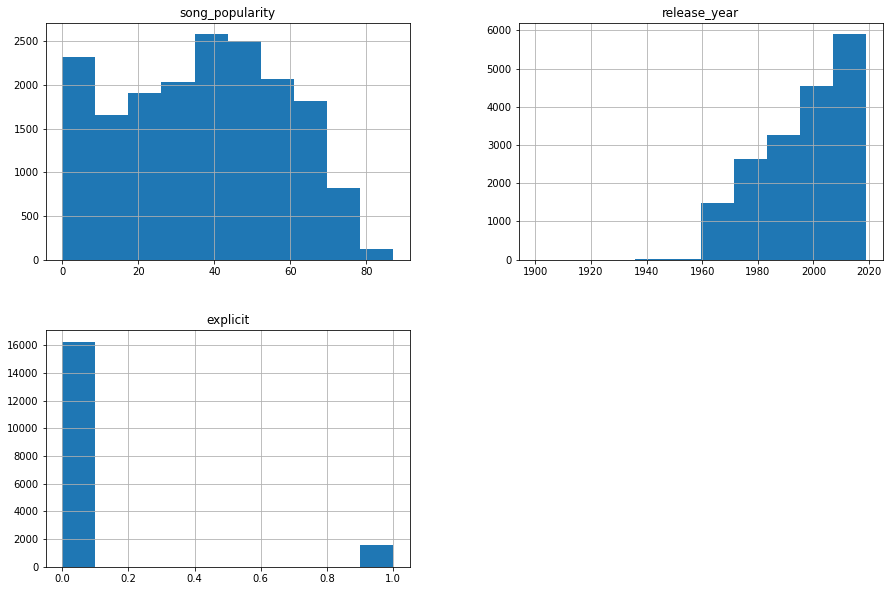

In [23]:
df_concat.hist(column=["song_popularity", "release_year", "explicit"], figsize=(15, 10))

array([[<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

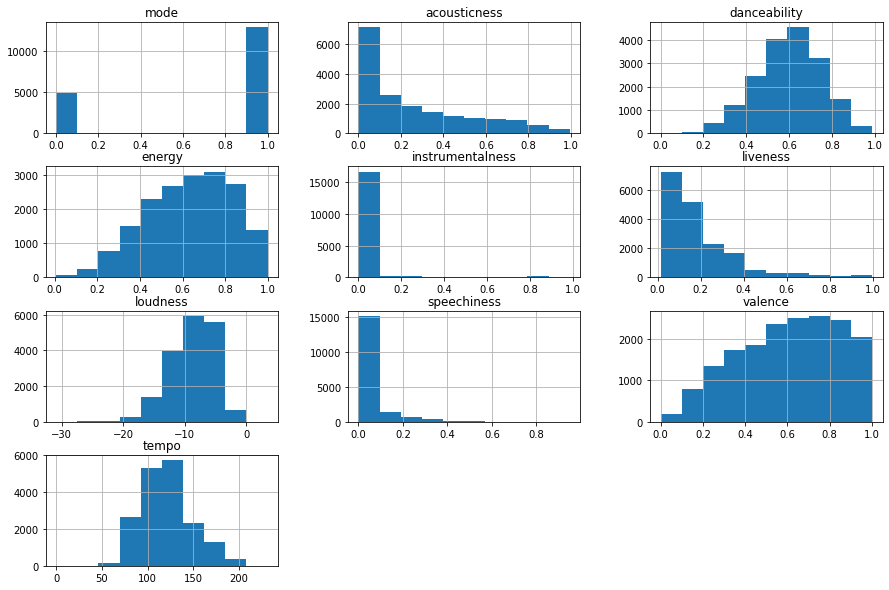

In [24]:
df_concat.hist(column=acoustic_features, figsize=(15, 10))

In [40]:
# todo : genres, main_genre, artists
feat = ["genres", "main_genre", "artists"]
for f in feat:
    print(f"\n{f}")
    print("-------------")
    vals = []
    for g in df_concat[f].values:
        vals += g
    n_vals = len(vals)
    print(f"number of vals : {n_vals}")
    n_diff_vals = len(list(set(list(vals))))
    print(f"number of different vals : {n_diff_vals}")


genres
-------------
number of vals : 104534
number of different vals : 835

main_genre
-------------
number of vals : 18861
number of different vals : 502

artists
-------------
number of vals : 19317
number of different vals : 4489


# todo : have to figure out a way to condense to most common / useful genres

In [51]:
min_songs = 100

main_genre = df_concat["main_genre"].values
vals = []
for g in main_genre:
    vals += g
h = pd.Series(vals).value_counts()
mask = (h >= min_songs).values
n_genres = np.sum(mask)
print(f"{n_genres} genres with at least {min_songs} songs\n")
print(h[:n_genres])

33 genres with at least 100 songs

album rock              2218
dance pop               1893
adult standards         1703
contemporary country    1188
classic soul             943
brill building pop       842
disco                    435
atl hip hop              388
karaoke                  360
bubblegum pop            347
alternative metal        314
funk                     284
dance rock               251
boy band                 224
east coast hip hop       192
pop                      190
hip hop                  184
art rock                 177
country                  176
alternative rock         175
chicago soul             143
freestyle                132
folk                     128
motown                   127
classic uk pop           117
conscious hip hop        117
canadian pop             116
blues-rock               110
hollywood                107
country gospel           103
australian pop           101
chicago rap              101
new wave pop             100
dtype: i

too many sub-genres that we don't really care about (canadian pop vs. classic uk pop OR album rock vs. art rock)

most interesting genres:
- pop
- rap
- country
- latin / reggaeton
- folk
- blues
- jazz
- worship / gospel / christian
- soul
- metal
- indie
- alternative
- electonic
- edm
- dance

In [54]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "rock" in val]
print(sub_genres)

['british indie rock', 'czech rock', 'rock', 'piano rock', 'rap rock', 'neo-rockabilly', 'classic canadian rock', 'modern rock', 'soft rock', 'melodic hard rock', 'classic rock', 'southern rock', 'pub rock', 'hard rock', 'australian alternative rock', 'garage rock', 'modern country rock', 'celtic rock', 'folk rock', 'psychedelic rock', 'finnish rockabilly', 'rock-and-roll', 'belgian rock', 'classic russian rock', 'yacht rock', 'german hard rock', 'dance rock', 'australian rock', 'j-poprock', 'country rock', 'irish rock', 'album rock', 'modern southern rock', 'boston rock', 'rock steady', 'roots rock', 'progressive rock', 'glam rock', 'swedish alternative rock', 'deep melodic hard rock', 'deep soft rock', 'modern alternative rock', 'dutch rock', 'pop rock', 'art rock', 'indie rock', 'classic garage rock', 'lovers rock', 'alternative rock', 'heartland rock', 'deep classic garage rock', 'funk rock', 'alternative pop rock', 'traditional rockabilly', 'christian alternative rock', 'psychedel

In [55]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "pop" in val]
print(sub_genres)

['nederpop', 'french pop', 'indie poptimism', 'channel pop', 'art pop', 'classic danish pop', 'classic swedish pop', 'israeli pop', 'ecuadorian pop', 'grunge pop', 'boy pop', 'latin viral pop', 'antiviral pop', 'electropowerpop', 'afropop', 'candy pop', 'synthpop', 'classic belgian pop', 'pop rap', 'new wave pop', 'jewish pop', 'electropop', 'indie pop', 'vapor pop', 'classic nz pop', 'sunshine pop', 'teen pop', 'belgian pop', 'baroque pop', 'j-poprock', 'bow pop', 'german pop', 'austropop', 'australian pop', 'brill building pop', 'classic norwegian pop', 'europop', 'metropopolis', 'deep pop r&b', 'reunion pop', 'indie pop rap', 'colombian pop', 'neo-synthpop', 'jangle pop', 'deep acoustic pop', 'classic uk pop', 'chamber pop', 'swamp pop', 'pop rock', 'post-teen pop', 'classic italian pop', 'pop', 'pop punk', 'j-pop girl group', 'alternative pop rock', 'latin pop', 'danish pop', 'pop edm', 'dance pop', 'hip pop', 'k-pop', 'canadian pop punk', 'canadian pop', 'nyc pop', 'operatic pop',

In [57]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "country" in val]
print(sub_genres)

['traditional country', 'neo-traditional country', 'modern country rock', 'outlaw country', 'country rock', 'contemporary country', 'country', 'alternative country', 'canadian country', 'australian country', 'alberta country', 'country dawn', 'country road', 'deep contemporary country', 'country gospel', 'arkansas country']


In [62]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "hop" in val or "rap" in val]
print(sub_genres)

['chicano rap', 'dirty texas rap', 'deep southern trap', 'old school hip hop', 'gangster rap', 'detroit hip hop', 'rap rock', 'new orleans rap', 'emo rap', 'alabama rap', 'pop rap', 'hip hop', 'florida rap', 'australian hip hop', 'hopebeat', 'dirty south rap', 'dark trap', 'milwaukee hip hop', 'trip hop', 'jazz vibraphone', 'east coast hip hop', 'alternative hip hop', 'hawaiian hip hop', 'west coast rap', 'baton rouge rap', 'hardcore hip hop', 'deep east coast hip hop', 'new jersey rap', 'chicago rap', 'rap conscient', 'indie pop rap', 'boston hip hop', 'nc hip hop', 'canadian hip hop', 'conscious hip hop', 'dfw rap', 'cali rap', 'houston rap', 'nyc rap', 'trap soul', 'detroit trap', 'trap music', 'battle rap', 'philly rap', 'miami hip hop', 'chinese hip hop', 'rap', 'atl hip hop', 'lgbtq+ hip hop', 'bass trap']


In [60]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "latin" in val or "reggaeton" in val]
print(sub_genres)

['latin jazz', 'latin viral pop', 'electro latino', 'deep latin christian', 'canadian latin', 'latin', 'reggaeton', 'latin pop']


In [63]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "worship" in val or "christian" in val or "gospel" in val]
print(sub_genres)

['anthem worship', 'gospel reggae', 'christian metal', 'deep latin christian', 'contemporary gospel', 'gospel r&b', 'country gospel', 'christian alternative rock', 'gospel']


In [64]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "indie" in val]
print(sub_genres)

['british indie rock', 'indie poptimism', 'la indie', 'alaska indie', 'indie r&b', 'icelandic indie', 'dutch indie', 'indie pop', 'k-indie', 'indie jazz', 'australian indie', 'alabama indie', 'manitoba indie', 'indie pop rap', 'canadian indie', 'indie folk', 'michigan indie', 'indian indie', 'indie rock', 'albuquerque indie', 'indie shoegaze', 'brooklyn indie']


In [65]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "alternative" in val]
print(sub_genres)

['australian alternative rock', 'alternative hip hop', 'alternative country', 'alternative r&b', 'swedish alternative rock', 'modern alternative rock', 'alternative rock', 'alternative pop rock', 'alternative dance', 'christian alternative rock', 'alternative metal', 'alternative pop']


In [69]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "house" in val or "electronic" in val or "edm" in val or "deep" in val]
print(sub_genres)

['deep talent show', 'deep disco', 'deep southern trap', 'deep eurodance', 'funky tech house', 'deep new wave', 'deep house', 'edm', 'vocal house', 'vintage french electronic', 'electronic', 'dutch house', 'detroit house', 'hip house', 'deep latin christian', 'deep ragga', 'brazilian house', 'deep funk', 'deep free jazz', 'deep motown', 'deep groove house', 'deep vocal house', 'deep adult standards', 'deep east coast hip hop', 'deep pop r&b', 'diva house', 'deep melodic hard rock', 'deep southern soul', 'deep soft rock', 'deep acoustic pop', 'chicago house', 'electro house', 'deep freestyle', 'deep classic garage rock', 'deep contemporary country', 'fidget house', 'pop edm', 'deep progressive trance', 'acid house', 'tropical house', 'deep northern soul', 'disco house', 'deep punk rock', 'pop house']


In [70]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "folk" in val or "acoustic" in val]
print(sub_genres)

['acoustic blues', 'american folk revival', 'british folk', 'appalachian folk', 'acoustic opm', 'folk rock', 'ectofolk', 'psychedelic folk', 'indie folk', 'canadian folk', 'deep acoustic pop', 'anti-folk', 'folk', 'folk-pop', 'acoustic pop']


In [71]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "jazz" in val]
print(sub_genres)

['latin jazz', 'smooth jazz', 'jazz violin', 'acid jazz', 'jazz vibraphone', 'deep free jazz', 'neo soul-jazz', 'indie jazz', 'vocal jazz', 'jazz electric bass', 'jazz funk', 'cool jazz', 'british jazz', 'jazz saxophone', 'jazz guitar', 'jazz blues', 'bossa nova jazz', 'jazz cubano', 'jazz trumpet', 'soul jazz', 'jazz organ']


In [78]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "soul" in val]
print(sub_genres)

['chicago soul', 'neo soul', 'southern soul', 'soul blues', 'neo soul-jazz', 'memphis soul', 'northern soul', 'classic soul', 'philly soul', 'post-disco soul', 'deep southern soul', 'british soul', 'trap soul', 'soul', 'deep northern soul', 'traditional soul', 'soul jazz']


In [76]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "motown" in val]
print(sub_genres)

['deep motown', 'motown']


In [74]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "metal" in val or "goth" in val]
print(sub_genres)

['metal', 'nu metal', 'metalcore', 'alabama metal', 'funk metal', 'german metalcore', 'gothic metal', 'christian metal', 'buffalo ny metal', 'groove metal', 'j-metal', 'glam metal', 'comic metal', 'nu-metalcore', 'alternative metal']


In [80]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "electronic" in val]
print(sub_genres)

['vintage french electronic', 'electronic']


In [81]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "dance" in val]
print(sub_genres)

['deep eurodance', 'dance-punk', 'belgian dance', 'dance rock', 'eurodance', 'australian dance', 'kids dance party', 'dance pop', 'alternative dance', 'bubblegum dance', 'dancehall']


In [82]:
unique_main_genres = list(set(list(vals)))
sub_genres = [val for val in unique_main_genres if "punk" in val]
print(sub_genres)

['dance-punk', 'anarcho-punk', 'cowpunk', 'pop punk', 'cyberpunk', 'argentine punk', 'canadian pop punk', 'horror punk', 'deep punk rock', 'screamo punk', 'crust punk']


# other cleaning ideas

- for collobration, take out lyrics of indivudal people and make as separate song? in the raw lyrics they sometimes have the artist in square brackets

# visualization / pre-processing ideas

- word cloud
- topic modelling